In [2]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_pickle("processed_data.pickle")

In [4]:
#convert the object feature to int
p_grade_map={}
j=0
for i in pd.unique(df['p_grade']):
    p_grade_map[i]=j
    j=j+1
benefit_map={}
j=0
for i in pd.unique(df['benefit']):
    benefit_map[i]=j
    j=j+1
e_type_map={}
j=0
for i in pd.unique(df['e_type']):
    e_type_map[i]=j
    j=j+1
    
df['p_grade']=df['p_grade'].map(p_grade_map)
df['benefit']=df['benefit'].map(benefit_map)
df['e_type']=df['e_type'].map(e_type_map)

We used autoencoder to synthesize new data as well as predict salary. 

Our inputs are the data without Salary features, however, unlike the normal autoencoder, our outputs are the data with Salary features instead of sharing the same structure of input data. The idea is that we want the autoencoder neural network to figure out the relation between salary and the other features in the trainning process. 

In [5]:
#Split the training and testing set. In this case, y is used to visualize the result after training, the input of 
#autoencoder if X_train[:,:-1] and the label is X_train.
x=df
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(np.asarray(x),np.asarray(y),test_size=0.2)

In [6]:
#create and store weights
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape))

#create and store bias
def bias_variable(shape):
    return tf.Variable(tf.random_normal(shape))

#we use random batch Adam gradient descent optimization algorithm in this project.
def random_batch(n, imgs, labels):
    index = np.arange(0 , len(imgs))
    np.random.shuffle(index)
    idx = index[0:n]
    imgs_random = [imgs[ i] for i in idx]
    labels_random = [labels[ i] for i in idx]

    return np.asarray(imgs_random), np.asarray(labels_random).reshape(-1,1)


At first, we encoded the data into 3 dimensions as a dimention reduction and visulized these 3D data to figure out if there is correlation between the data and Salary. The visulization was stored at file 3D.gif. The color of the points reflects the value of Salary: the darkder color means smaller salary, the lighter color means larger salary. The GIF shows us there is a obvious correlation between the data points and salary, although it can't be explained by regular linear relationship. What's more, the data points all locate on one plane, which indicates 2 dimensions are enough to store the information of original data.

In [ ]:
#create data for 3D visualization and use 3Dvisualization.py to do the visualization.

training_epochs = 20 #training epochs
batch_size = 128     # size of each batch
total_batch = int(df.shape[0]/batch_size)   # number of batch of each training epochs
n_input = 19         #number of feature of input data
n_output = 20        #number of feature of output data (with salary)

#placeholder of neural network
X=tf.placeholder('float',[None,n_input])
y=tf.placeholder('float',[None,n_output])


#the structure of autoencoder
n_hidden_1 = 32
n_hidden_2 = 64
n_hidden_3 = 128
n_hidden_4 = 64
n_hidden_5 = 32
n_hidden_6 = 10
n_hidden_7 = 3
weights = {
    'encoder_h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1],stddev=0.2)),
    'encoder_h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],stddev=0.2)),
    'encoder_h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3],stddev=0.2)),
    'encoder_h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4],stddev=0.2)),
    'encoder_h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5],stddev=0.2)),
    'encoder_h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6],stddev=0.2)),
    'encoder_h7': tf.Variable(tf.truncated_normal([n_hidden_6, n_hidden_7],stddev=0.2)),
    'decoder_h1': tf.Variable(tf.truncated_normal([n_hidden_7, n_hidden_6],stddev=0.2)),
    'decoder_h2': tf.Variable(tf.truncated_normal([n_hidden_6, n_hidden_5],stddev=0.2)),
    'decoder_h3': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_4],stddev=0.2)),
    'decoder_h4': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_3],stddev=0.2)),
    'decoder_h5': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_2],stddev=0.2)),
    'decoder_h6': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_1],stddev=0.2)),
    'decoder_h7': tf.Variable(tf.truncated_normal([n_hidden_1, n_output],stddev=0.2)),
}
biases = {
    'encoder_b1': tf.Variable(tf.constant(0.1,shape=[n_hidden_1])),
    'encoder_b2': tf.Variable(tf.constant(0.1,shape=[n_hidden_2])),
    'encoder_b3': tf.Variable(tf.constant(0.1,shape=[n_hidden_3])),
    'encoder_b4': tf.Variable(tf.constant(0.1,shape=[n_hidden_4])),
    'encoder_b5': tf.Variable(tf.constant(0.1,shape=[n_hidden_5])),
    'encoder_b6': tf.Variable(tf.constant(0.1,shape=[n_hidden_6])),
    'encoder_b7': tf.Variable(tf.constant(0.1,shape=[n_hidden_7])),
    'decoder_b1': tf.Variable(tf.constant(0.1,shape=[n_hidden_6])),
    'decoder_b2': tf.Variable(tf.constant(0.1,shape=[n_hidden_5])),
    'decoder_b3': tf.Variable(tf.constant(0.1,shape=[n_hidden_4])),
    'decoder_b4': tf.Variable(tf.constant(0.1,shape=[n_hidden_3])),
    'decoder_b5': tf.Variable(tf.constant(0.1,shape=[n_hidden_2])),
    'decoder_b6': tf.Variable(tf.constant(0.1,shape=[n_hidden_1])),
    'decoder_b7': tf.Variable(tf.constant(0.1,shape=[n_output])),
}

#encoder function
def encoder(x):
    with tf.variable_scope('encoder',reuse= False):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_h1']),
                                       biases['encoder_b1']))
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                       biases['encoder_b2']))
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                       biases['encoder_b3']))
        layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                       biases['encoder_b4']))
        layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['encoder_h5']),
                                       biases['encoder_b5']))
        layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['encoder_h6']),
                                       biases['encoder_b6']))
        layer_7 = tf.add(tf.matmul(layer_6, weights['encoder_h7']),
                                        biases['encoder_b7'])
        return layer_7
    
#decoder function
def decoder(x):
    with tf.variable_scope('decoder',reuse= False):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_h1']),
                                       biases['decoder_b1']))
        layer_2 =tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                       biases['decoder_b2']))
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                    biases['decoder_b3']))
        layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                    biases['decoder_b4']))
        layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['decoder_h5']),
                                    biases['decoder_b5']))
        layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['decoder_h6']),
                                    biases['decoder_b6']))
        layer_7 = (tf.add(tf.matmul(layer_6, weights['decoder_h7']),
                                    biases['decoder_b7']))
        return layer_7
    
 

encoder_op = encoder(X)

decoder_op = decoder(encoder_op)



y_pred = decoder_op
y_ = y

#cost function
cost =  tf.reduce_mean(tf.pow(y_-y_pred,2))

#optimizer
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

#training process
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x, batch_y = random_batch(batch_size,X_train, y_train)
            _, c = sess.run([optimizer,cost],feed_dict={X:batch_x[:,:-1], y:batch_x})



encoder_result = sess.run(encoder_op, feed_dict={X: X_train[:,:-1]})


data3 = pd.DataFrame(encoder_result)
data3.to_csv('3Ddata.csv')

y_train3= pd.DataFrame(y_train)
y_train3.to_csv('y_train.csv')


sess.close()


We then built a 2D Autoencoder and the encoding result also shows a obvious relationship between the data and salary. The cost of the training is acceptable.


###
When we training this model, the optimazation ofen trapped in a local minimum, whose visualization is a single line. So we had to train the model several times until it successfully arrived in global minimum.
###

Epoch: 0001 cost = 1975.419555664
Epoch: 0002 cost = 1658.411743164
Epoch: 0003 cost = 1767.634277344
Epoch: 0004 cost = 1283.871948242
Epoch: 0005 cost = 929.289611816
Epoch: 0006 cost = 1149.968383789
Epoch: 0007 cost = 1158.459228516
Epoch: 0008 cost = 1012.776245117
Epoch: 0009 cost = 950.655151367
Epoch: 0010 cost = 1023.232299805
Autoencoder training finish!


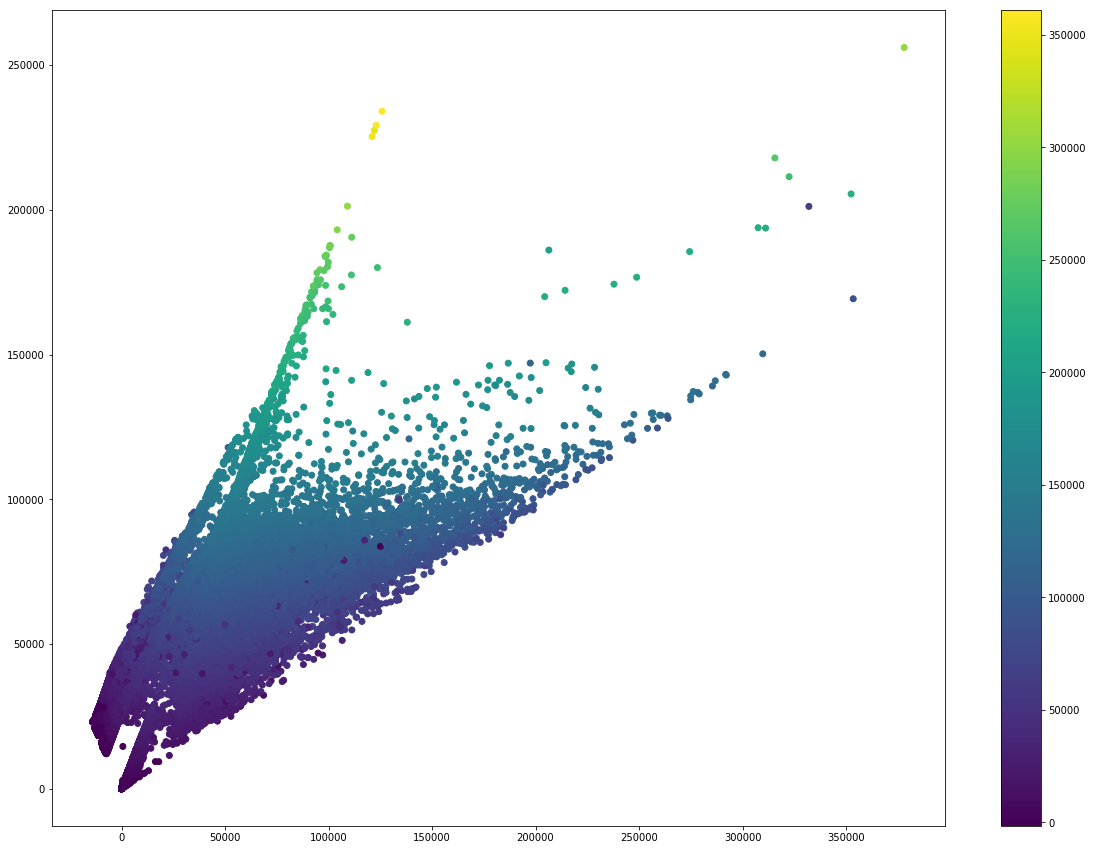

In [7]:
training_epochs = 10 #training epochs
batch_size = 100     # size of each batch
total_batch = int(df.shape[0]/batch_size)   # number of batch of each training epochs
n_input = 19         #number of feature of input data
n_output = 20        #number of feature of output data (with salary)

#placeholder of neural network
X=tf.placeholder('float',[None,n_input])
y=tf.placeholder('float',[None,n_output])


#the structure of autoencoder
n_hidden_1 = 32
n_hidden_2 = 64
n_hidden_3 = 128
n_hidden_4 = 64
n_hidden_5 = 32
n_hidden_6 = 10
n_hidden_7 = 2
weights = {
    'encoder_h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1],stddev=0.1)),
    'encoder_h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],stddev=0.1)),
    'encoder_h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3],stddev=0.1)),
    'encoder_h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4],stddev=0.1)),
    'encoder_h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5],stddev=0.1)),
    'encoder_h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6],stddev=0.1)),
    'encoder_h7': tf.Variable(tf.truncated_normal([n_hidden_6, n_hidden_7],stddev=0.1)),
    'decoder_h1': tf.Variable(tf.truncated_normal([n_hidden_7, n_hidden_6],stddev=0.1)),
    'decoder_h2': tf.Variable(tf.truncated_normal([n_hidden_6, n_hidden_5],stddev=0.1)),
    'decoder_h3': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_4],stddev=0.1)),
    'decoder_h4': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_3],stddev=0.1)),
    'decoder_h5': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_2],stddev=0.1)),
    'decoder_h6': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_1],stddev=0.1)),
    'decoder_h7': tf.Variable(tf.truncated_normal([n_hidden_1, n_output],stddev=0.1)),
}
biases = {
    'encoder_b1': tf.Variable(tf.constant(0.1,shape=[n_hidden_1])),
    'encoder_b2': tf.Variable(tf.constant(0.1,shape=[n_hidden_2])),
    'encoder_b3': tf.Variable(tf.constant(0.1,shape=[n_hidden_3])),
    'encoder_b4': tf.Variable(tf.constant(0.1,shape=[n_hidden_4])),
    'encoder_b5': tf.Variable(tf.constant(0.1,shape=[n_hidden_5])),
    'encoder_b6': tf.Variable(tf.constant(0.1,shape=[n_hidden_6])),
    'encoder_b7': tf.Variable(tf.constant(0.1,shape=[n_hidden_7])),
    'decoder_b1': tf.Variable(tf.constant(0.1,shape=[n_hidden_6])),
    'decoder_b2': tf.Variable(tf.constant(0.1,shape=[n_hidden_5])),
    'decoder_b3': tf.Variable(tf.constant(0.1,shape=[n_hidden_4])),
    'decoder_b4': tf.Variable(tf.constant(0.1,shape=[n_hidden_3])),
    'decoder_b5': tf.Variable(tf.constant(0.1,shape=[n_hidden_2])),
    'decoder_b6': tf.Variable(tf.constant(0.1,shape=[n_hidden_1])),
    'decoder_b7': tf.Variable(tf.constant(0.1,shape=[n_output])),
}

#encoder function
def encoder(x):
    with tf.variable_scope('encoder',reuse= False):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_h1']),
                                       biases['encoder_b1']))
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                       biases['encoder_b2']))
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                       biases['encoder_b3']))
        layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                       biases['encoder_b4']))
        layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['encoder_h5']),
                                       biases['encoder_b5']))
        layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['encoder_h6']),
                                       biases['encoder_b6']))
        layer_7 = tf.add(tf.matmul(layer_6, weights['encoder_h7']),
                                        biases['encoder_b7'])
        return layer_7
    
#decoder function
def decoder(x):
    with tf.variable_scope('decoder',reuse= False):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_h1']),
                                       biases['decoder_b1']))
        layer_2 =tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                       biases['decoder_b2']))
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                    biases['decoder_b3']))
        layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                    biases['decoder_b4']))
        layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['decoder_h5']),
                                    biases['decoder_b5']))
        layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['decoder_h6']),
                                    biases['decoder_b6']))
        layer_7 = (tf.add(tf.matmul(layer_6, weights['decoder_h7']),
                                    biases['decoder_b7']))
        return layer_7
    
 

encoder_op = encoder(X)

decoder_op = decoder(encoder_op)



y_pred = decoder_op
y_ = y

#cost function
cost =  tf.reduce_mean(tf.abs(y_-y_pred))

#optimizer
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#training process
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x, batch_y = random_batch(batch_size,X_train, y_train)
            _, c = sess.run([optimizer,cost],feed_dict={X:batch_x[:,:-1], y:batch_x})
        print('Epoch:','%04d' % (epoch+1),'cost =', "{:.9f}".format(c))
print('Autoencoder training finish!')



encoder_result = sess.run(encoder_op, feed_dict={X: X_train[:,:-1]})

fig = plt.figure(figsize=(20,15))
plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=y_train)
plt.colorbar()
plt.show()




In [8]:
#save the model.
saver= tf.train.Saver()
save_path = saver.save(sess,'/Users/rosen/Documents/GitHub/Good_example_2D/Good_example_2D.ckpt')

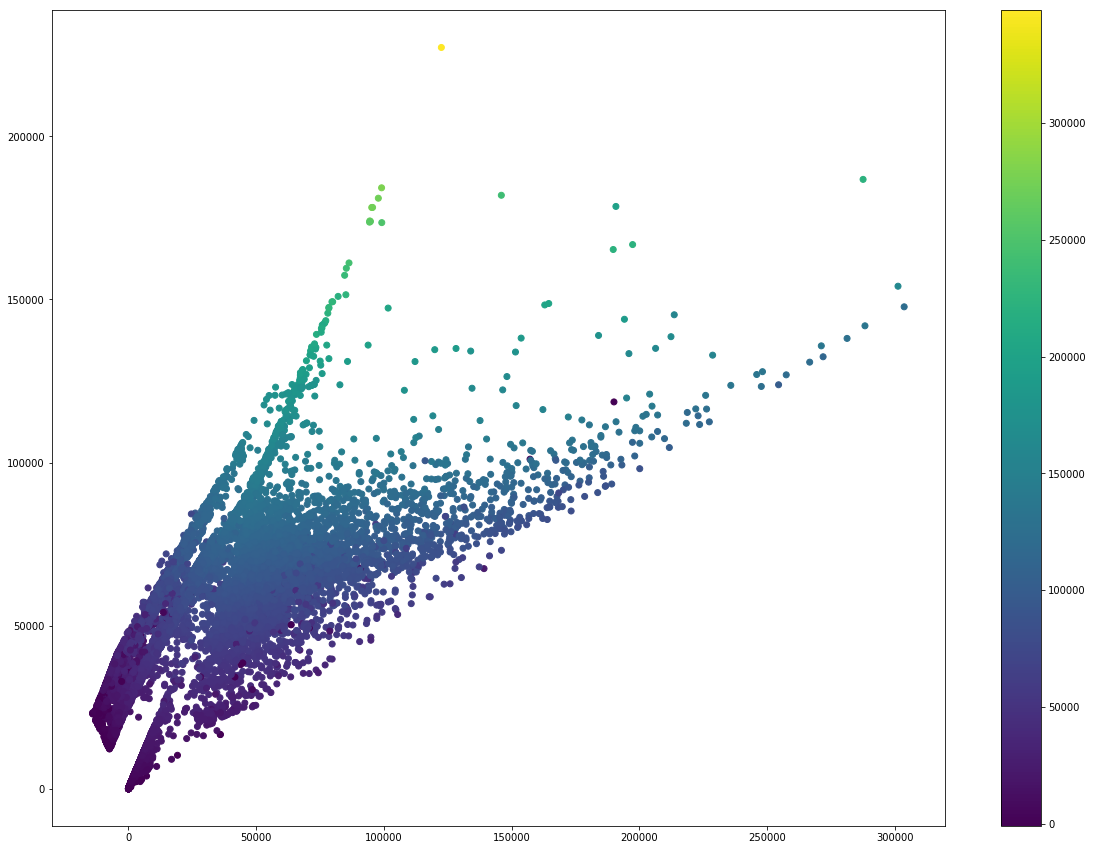

In [9]:
#test the encoder with testing set, the color shows the value of True Salary of each point.
encoder_result = sess.run(encoder_op, feed_dict={X: X_test[:,:-1]})
fig = plt.figure(figsize=(20,15))
plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=y_test) #color is created by true salary
plt.colorbar()
plt.show()

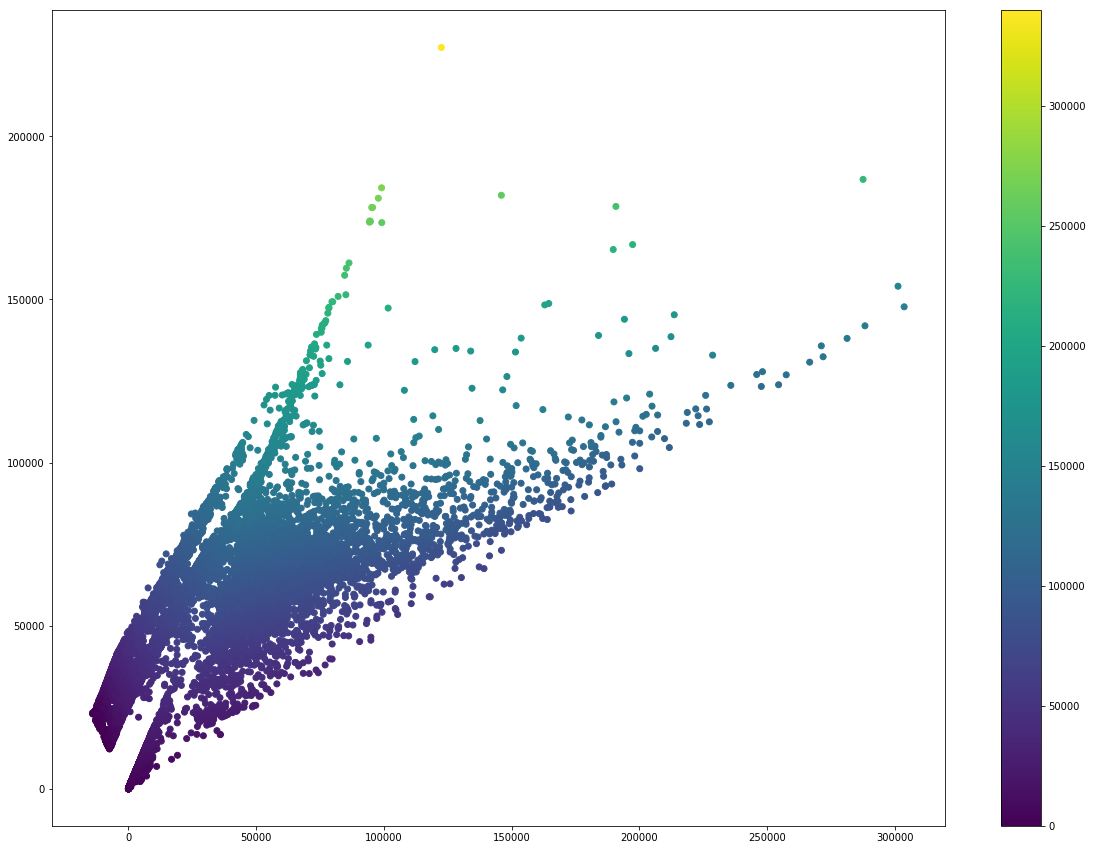

In [10]:
#test the decoder with testing set, the color shows the value of the predictive value created by the autoencoder 
# of each point.
decoder_result = sess.run(decoder_op, feed_dict={X: X_test[:,:-1]})
fig = plt.figure(figsize=(20,15))
plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=decoder_result[:,-1]) #color is created by predictve salary
plt.colorbar()
plt.show()

##
The 2 very similar pictures above indicate that the autocencoder successfully keeps the important information of the features except salary,  which can also be used to predict salary. Therefore, we sure the synthesis data will remain the same (or similar) relationship with salary.
##

Now we can use the decoder to synthesize new data. Although we can choose a random 2-dimensional point as the input of the decoder, we still hope our random sample has a similar distribution as the originial data.

We failed to find a method to generate samples with the same distribution of given data, so we finally worked out a very simple way to do so:
1. randomly pick up a point from the data
2. choose 2 random values from a normal distribution and add the values to each dimension of the point respectively.
3. we can assgin a large variance of the normal distribution if we want a very different sample.

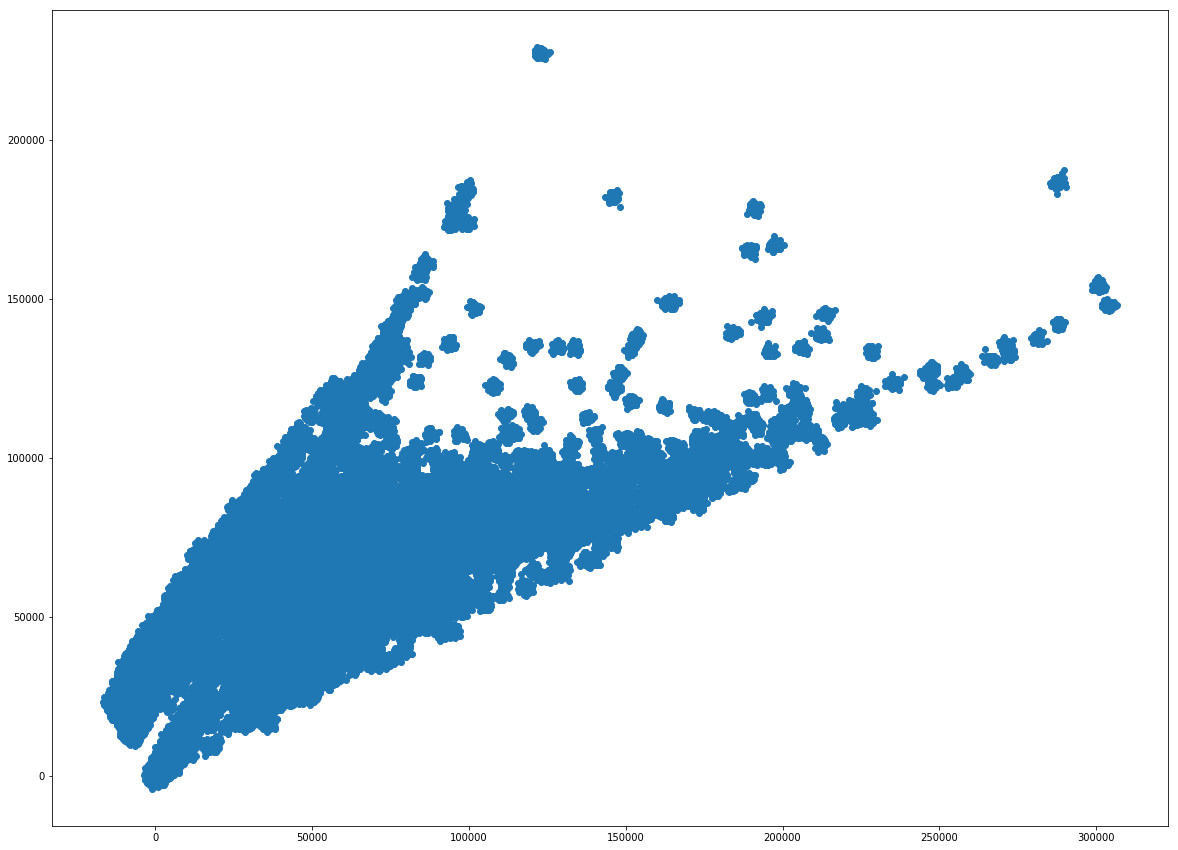

In [11]:
#define the sample generating function

def create_newsample(sample, mean, var):
    idx = np.random.randint(0,sample.shape[0])
    samp = []
    for i in range(len(sample[idx])):
        samp.append(sample[idx][i]+np.random.normal(mean,var))
    return np.asarray(samp)

#generate fake 2D sample
fake_sample_2D=[]
for i in range(800000):
    fake_sample_2D.append(create_newsample(encoder_result,0,1000))
fake_sample = np.asarray(fake_sample_2D)

#show the distribution of the fake sample
fig = plt.figure(figsize=(20,15))
plt.scatter(fake_sample[:, 0], fake_sample[:, 1])

plt.show()

In [12]:
#synthesize data
synthesis_data = sess.run(decoder_op,feed_dict={encoder_op:fake_sample})

In [13]:
#save the synthesis data
df_synthesis_data = pd.DataFrame(synthesis_data[:,:-1],columns= df.iloc[:,:-1].columns)


In [14]:
df_synthesis_data.to_csv('synthesis_data.csv')

In [ ]:
###把object的列改回来，但是我电脑跑这一步会卡死
e_type_map_new = dict(zip(e_type_map.values(),e_type_map.keys()))
benefit_map_new = dict(zip(benefit_map.values(),benefit_map.keys()))
p_grade_map_new = dict(zip(p_grade_map.values(),p_grade_map.keys()))


for i in range(800000):
    a=round(df_synthesis_data['benefit'][i])
    if a<0:
        a=0
    elif a >4:
        a=4
    df_synthesis_data['benefit'][i]=benefit_map_new[a]
    
    b=round(df_synthesis_data['e_type'][i])
    if b<0:
        b=0
    elif b >2:
        b=2    
    df_synthesis_data['e_type'][i]=e_type_map_new[b]
    
    c=round(df_synthesis_data['p_grade'][i])
    if c<0:
        c=0
    elif c >28:
        c=28
    df_synthesis_data['p_grade'][i]=p_grade_map_new[c]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be